In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
from google.colab import drive
# if uploaded directly to Colab
# data = pd.read_csv('/content/bitstampUSD_1-min_data_2012-01-01_to_2020-04-22.csv')
# coindata = pd.read_csv('/content/coinbaseUSD_1-min_data_2014-12-01_to_2019-01-09.csv')
data = pd.read_csv('/content/drive/MyDrive/bitstampUSD_1-min_data_2012-01-01_to_2020-04-22.csv')
coindata = pd.read_csv('/content/drive/MyDrive/coinbaseUSD_1-min_data_2014-12-01_to_2019-01-09.csv')

data-------------
newdata-------------
means--------------
head-----------------
description----------
coindata-------------
between--------------------
itmes----------------------------
df-----------------------------------
dfall---------------------------------


,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.390000,4.390000,4.390000,4.390000,0.455581,2.000000,4.390000
1,1325317980,4.390000,4.390000,4.390000,4.390000,0.555046,2.436653,4.390000
2,1325318040,4.390000,4.390000,4.390000,4.390000,0.654511,2.873305,4.390000
3,1325318100,4.390000,4.390000,4.390000,4.390000,0.753977,3.309958,4.390000
4,1325318160,4.390000,4.390000,4.390000,4.390000,0.853442,3.746611,4.390000
...,...,...,...,...,...,...,...,...
545,1325350620,4.496812,4.564783,4.496812,4.564783,38.156144,172.520618,4.522458
546,1325350680,4.498406,4.567391,4.498406,4.567391,38.009220,171.950478,4.524435
547,1325350740,4.500000,4.570000,4.500000,4.570000,37.862297,171.380338,4.526411
548,1325350800,4.580000,4.580000,4.580000,4.580000,9.000000,41.220000,4.580000


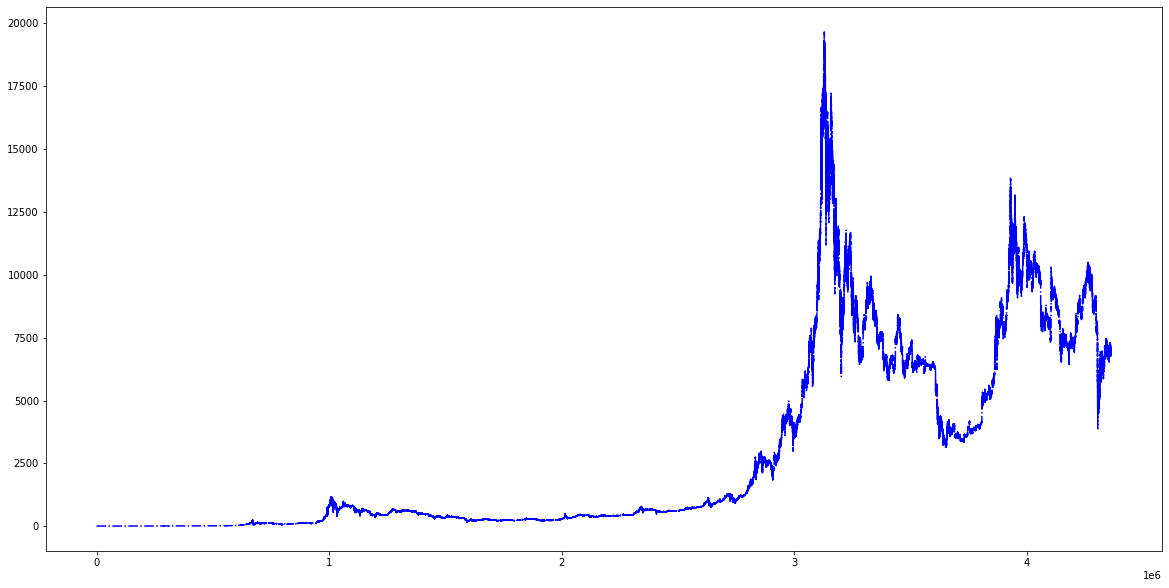

In [4]:
print("data-------------")
# print(data)
# newdata is just the original dataset with NaN values removed
newdata = data.dropna(axis=0)
# print(newdata)
# uses timestamp, open, high, low, close, volume(btc), volume(currency), weighted_price
print("newdata-------------")
# print(newdata)
print("means--------------")
# print(data.mean, newdata.mean)
print("head-----------------")
# newdata.head()
print("description----------")
# data.describe()
print("coindata-------------")
# print(data)
# data.head(10)
print("between--------------------")
# data.head(10)
# coindata.describe()
# data.info()
print("itmes----------------------------")
# print(data.items)
print("df-----------------------------------")
# this can be used to interpolate single columns
# df = data.assign(FillMean=data.Weighted_Price.fillna(data.Weighted_Price.mean()))
# df = df.assign(Weighted_Price=df.Weighted_Price.interpolate(method='linear'))
# df.info()
# print(df)
print("dfall---------------------------------")
# but htis for for total interpolation
dfall = data.interpolate(method='linear')
# print(dfall)
dfall.Weighted_Price.plot(style=['b-.', 'ko', 'r.', 'rx-'], figsize=(20,10))

# data.assign()

dfall.head(550)

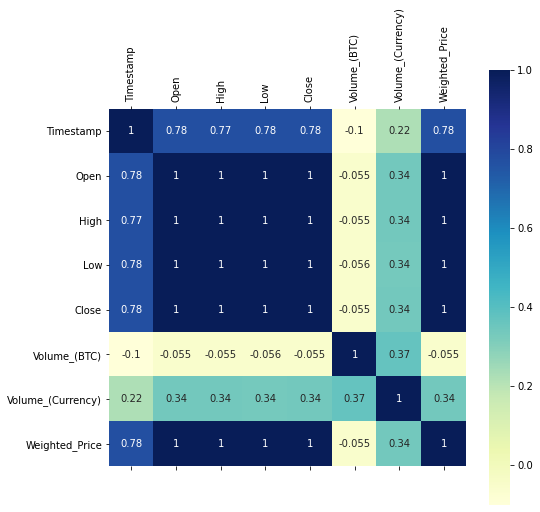

In [5]:
# some data deatures are extraneous
cormat = dfall.corr()
# https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas
# cormat.plot()
# plt.matshow(cormat)
plt.show()
fig, ax = plt.subplots(figsize=(8, 8))
ax.matshow(cormat)
plt.xticks(range(len(cormat.columns)), cormat.columns);
plt.yticks(range(len(cormat.columns)), cormat.columns);
# https://stackoverflow.com/questions/11917547/how-to-annotate-heatmap-with-text-in-matplotlib
import seaborn as sns
sns.heatmap(cormat, annot=True, cmap="YlGnBu")
# open, high, low, clsoe and weighted price all exactly correlated

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4363457 entries, 0 to 4363456
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Timestamp          int64  
 1   Volume_(BTC)       float64
 2   Volume_(Currency)  float64
 3   Weighted_Price     float64
dtypes: float64(3), int64(1)
memory usage: 133.2 MB
          Timestamp  Volume_(BTC)  Volume_(Currency)  Weighted_Price
0        1325317920      0.455581           2.000000        4.390000
1        1325317980      0.555046           2.436653        4.390000
2        1325318040      0.654511           2.873305        4.390000
3        1325318100      0.753977           3.309958        4.390000
4        1325318160      0.853442           3.746611        4.390000
...             ...           ...                ...             ...
4363452  1587513360      0.125174         858.128697     6855.498790
4363453  1587513420      1.224777        8396.781459     6855.763449
4363454  1587513480    

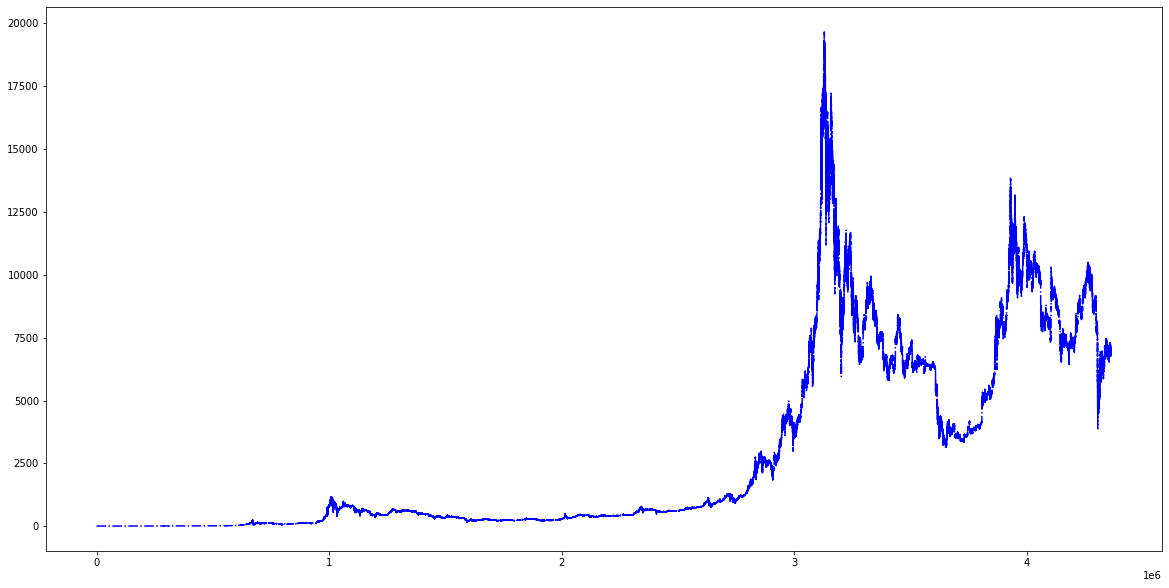

In [6]:
dfnoncor = dfall.drop(labels=['Open', 'High', 'Low', 'Close'], axis='columns')
dfnoncor.Weighted_Price.plot(style=['b-.', 'ko', 'r.', 'rx-'], figsize=(20,10))
dfnoncor.info()
newcor = dfnoncor.corr()
# plt.matshow(newcor)
print(dfnoncor)
print(dfnoncor[8::60])
# the original timestamp was in seconds
# dfnoncor['Timestamp'] = pd.to_datetime(dfnoncor['Timestamp'],unit='s')
print(dfnoncor)
# print(dfnoncor[8::60])


In [9]:
# make sure when saving you save in same format
dfnoncor.to_csv('new_data.csv', index=False)
redata = pd.read_csv('new_data.csv')
print(redata)

          Timestamp  Volume_(BTC)  Volume_(Currency)  Weighted_Price
0        1325317920      0.455581           2.000000        4.390000
1        1325317980      0.555046           2.436653        4.390000
2        1325318040      0.654511           2.873305        4.390000
3        1325318100      0.753977           3.309958        4.390000
4        1325318160      0.853442           3.746611        4.390000
...             ...           ...                ...             ...
4363452  1587513360      0.125174         858.128697     6855.498790
4363453  1587513420      1.224777        8396.781459     6855.763449
4363454  1587513480      7.089168       48533.089069     6846.090966
4363455  1587513540      0.012231          83.831604     6854.195090
4363456  1587513600      0.014436          98.896906     6850.600000

[4363457 rows x 4 columns]


In [7]:
def split_window(features):
  print("inside split window --------------------------")
  print(features)
  print(type(features))
  input_w = 24 * 60
  label_w = 1
  label_start = 24 * 60 + 59
  input_slice = slice(0, input_w)
  labels_slice = slice(label_start, None)
  inputs = features[:, input_slice, :]
  labels = features[:, labels_slice, :]
  labels = labels[:, :, -1:]
  inputs.set_shape([None, input_w, None])
  labels.set_shape([None, label_w, None])
  # labels.set_shape([None, label_w, None])
  print(labels)
  print(type(labels))
  print("right ebfore return in split window function------------")
  return inputs, labels

def keras_data(dataframe):
  dataframe = dataframe.drop(labels=['Timestamp'], axis='columns')
  # print((dataframe - dataframe.mean()) / dataframe.std())
  dataframe = (dataframe - dataframe.mean()) / dataframe.std()
  # print(dataframe)
  data_arr = np.array(dataframe, dtype=np.float32)
  # print(data_arr)
  print("inside keras data====================")
  # print(data_arr)
  print(data_arr.shape)
  # print(data_arr[8 + 60 * 25: : 60].shape)
  sequence_length = 60 * 25
  id = tf.keras.preprocessing.timeseries_dataset_from_array(data_arr,
                                                            targets=None,
                                                       sequence_length= 60 * 25,
                                                       sequence_stride=60,
                                                       batch_size=64,
                                                       # sampling_rate=1,
                                                       start_index=8)
  print("+++++++++")
  print(id)
  print(type(id))
  # for thing in id:
  #   print(thing)
  # for inputs, targets in id:
  #   print("Input:", inputs.numpy(), "Target:", targets.numpy())
  id = id.map(split_window)
  print(type(id))
  if id is None:
    print("none")
  print("--------------------")
  return id
n = len(dfnoncor)
train_split = int(n * 0.8)

train_df = dfnoncor[:train_split]
# print("traindf type")
# print(train_df)
# print(type(train_df))
valid_df = dfnoncor[train_split:]
train_ds = keras_data(train_df)
# print(valid_df)
# print(train_ds)
valid_ds = keras_data(valid_df)

inside keras data====================
(3490765, 3)
+++++++++
<BatchDataset shapes: (None, None, 3), types: tf.float32>
<class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>
inside split window --------------------------
Tensor("args_0:0", shape=(None, None, 3), dtype=float32)
<class 'tensorflow.python.framework.ops.Tensor'>
Tensor("strided_slice_2:0", shape=(None, 1, 1), dtype=float32)
<class 'tensorflow.python.framework.ops.Tensor'>
right ebfore return in split window function------------
<class 'tensorflow.python.data.ops.dataset_ops.MapDataset'>
--------------------
inside keras data====================
(872692, 3)
+++++++++
<BatchDataset shapes: (None, None, 3), types: tf.float32>
<class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>
inside split window --------------------------
Tensor("args_0:0", shape=(None, None, 3), dtype=float32)
<class 'tensorflow.python.framework.ops.Tensor'>
Tensor("strided_slice_2:0", shape=(None, 1, 1), dtype=float32)
<class 'tensorflow.p

In [8]:
keras = tf.keras
def make_model():
  model = keras.models.Sequential()
  # model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
  model.add(keras.layers.LSTM(64, activation='relu', return_sequences=False))
  model.add(keras.layers.Dense(1))
  model.compile(optimizer='adam',
                loss='mse',
                metrics=[tf.metrics.MeanAbsoluteError(), 'accuracy'])
  return model

dfmodel = make_model()


In [9]:
# https://www.tensorflow.org/tutorials/structured_data/time_series#single_step_models
print(train_ds)
print(valid_ds)
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2,
                                          mode='min')
dfmodel.fit(x=train_ds,
            validation_data=valid_ds,
            callbacks=[es],
            epochs=20)

<MapDataset shapes: ((None, 1440, 3), (None, 1, 1)), types: (tf.float32, tf.float32)>
<MapDataset shapes: ((None, 1440, 3), (None, 1, 1)), types: (tf.float32, tf.float32)>
Epoch 1/20
909/909 [==============================] - 823s 904ms/step - loss: 0.0153 - mean_absolute_error: 0.0492 - accuracy: 0.0000e+00 - val_loss: 0.3321 - val_mean_absolute_error: 0.4762 - val_accuracy: 0.0000e+00
Epoch 2/20
909/909 [==============================] - 825s 908ms/step - loss: 0.0093 - mean_absolute_error: 0.0326 - accuracy: 0.0000e+00 - val_loss: 0.1164 - val_mean_absolute_error: 0.2810 - val_accuracy: 0.0000e+00
Epoch 3/20
909/909 [==============================] - 808s 889ms/step - loss: 0.0015 - mean_absolute_error: 0.0163 - accuracy: 0.0000e+00 - val_loss: 0.0852 - val_mean_absolute_error: 0.2467 - val_accuracy: 0.0000e+00
Epoch 4/20
909/909 [==============================] - 801s 881ms/step - loss: 8.6400e-04 - mean_absolute_error: 0.0094 - accuracy: 0.0000e+00 - val_loss: 0.1261 - val_mean_ab

In [10]:
dfmodel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 64)                17408     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 17,473
Trainable params: 17,473
Non-trainable params: 0
_________________________________________________________________
